# Волкова Татьяна | ПИ19-2 | Линейная регрессия | ML1.1
## Практические задания

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mvid = pd.read_csv('data/MVID_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')

In [3]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [4]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [5]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

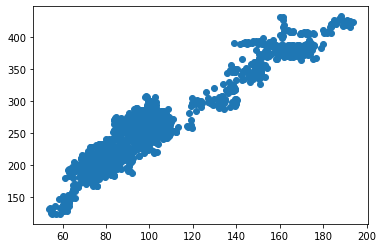

In [6]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [7]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [8]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 36271.58344889084


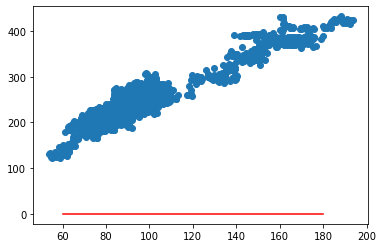

In [9]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [10]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 6734.135540194945


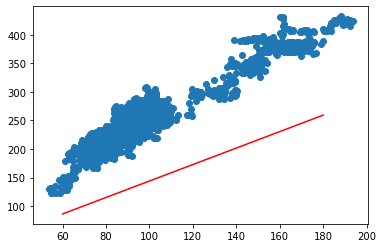

In [11]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [12]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err          
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [13]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 298.76881676471504


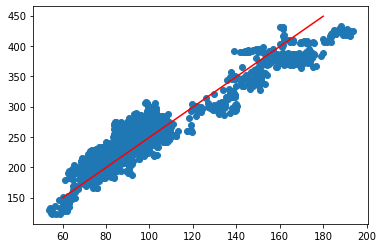

In [14]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

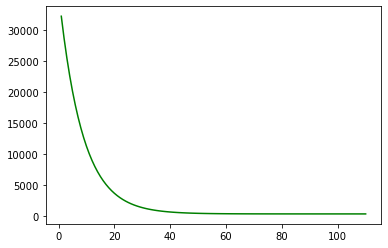

In [15]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## Контрольные вопросы

#### 1.	Сформулируйте задачу регрессии.
Прогноз какого либо численного показателя (например, цены, температуры и др)  на основе выборки объектов с различными признаками
#### 2.	Что такое метод наименьших квадратов?
Один из базовых методов регрессионного анализа для оценки неизвестных параметров регрессионных моделей по выборочным данным. Метод основан на минимизации суммы квадратов остатков регрессии.
#### 3.	Какие функции ошибки используются в регрессионных моделях? Расскажите про три самые популярные.
1) Среднеквадратическое отклонение (mean squared error, MSE), корень из этой ошибки: RMSE – Root Mean Squared Error, коэффициент детерминации (R2)

2) Средний модуль отклонения (MAE – Mean Absolute Error или MAD – Mean Absolute Deviation)

3) Функция ошибки Хьюбера (Huber loss) и logcosh

4) Средний процент отклонения (MAPE – Mean Absolute Percent Error)

5) Симметричный средний процент отклонения (SMAPE – Symmetric Mean Absolute Percentage Error)
#### 4.	Что показывает конкретное значение ошибки регрессии?
Насколько велика ошибка предсказания значений переменной Y на основании значений Х.
#### 5.	Зачем нужно строить кривые обучения?
Кривая обучения модели, полученная в результате обучения набора обучающих данных и набора данных проверки, может использоваться для диагностики недостаточного, чрезмерного или хорошего соответствия модели.
Данная кривая показывает изначальную сложность изучения чего-либо.
Для оценки того, насколько хорошо обучилась модель

## Дополнительные задания

#### Модель построена на другой паре инструментов при помощи библиотеки sklearn

In [16]:
yndx = pd.read_csv('data/YNDX_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')
df = pd.merge(sber, yndx, on='<DATE>')
x = df['<CLOSE>_x'].values
y = df['<CLOSE>_y'].values

r2_score(LinearRegression) = 0.6567899594762094


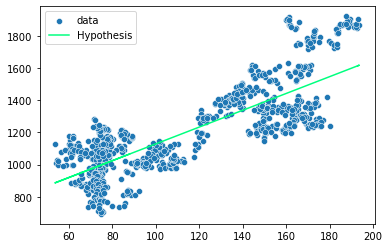

In [17]:
import seaborn as sns
from matplotlib.axes import Axes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75)
model = LinearRegression().fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
sklearn_pred = model.predict(x.reshape(-1, 1))
ax: Axes = sns.scatterplot(x=x, y=y)
ax.plot(x, sklearn_pred, color='springgreen')
ax.legend(['data', 'Hypothesis', 'LinearRegression'])
print(f'r2_score(LinearRegression) = {r2_score(y, sklearn_pred)}')